In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time
import math
from numba import njit,prange

In [76]:
@njit(boundscheck=True)
def Strap(Vrf, Vdc):
    
    #Define the parameters that make up your trap
    t =  0.097; # the very top of the mirror
    b = -0.008; # The bottom of the mirror block
    f = -0.003; # from focus to bottom of parabola
    bottomHole = 0.00076; # radius of the hole at the bottom of the mirror
    COuterR = 0.0001025; # The outer radius of the central grounded electrode
    CInnerR = 0.00005; # The inner radius of the central grounded electrode
    CHeight = 0.0009; # The half height of the central grounded electrode
    RFOuterR = 0.000455;#0.000675; # The outer radius of the RF electrode
    RFInnerR = 0.0003;#0.000375; # The inner radius of the RF electrode
    RFHeight = 0.001;#0.00085; # The half height of the RF electrode
       
    
    # Picking the size of our world
    gmax = 0.052 #physical size of the space simulated (meters)
    points = 4001 # number of points that are being simulated
    steps = points - 1 # just the number of points minus one
    x = np.linspace(-0.5, 0.5, points) #chosing how much space in the x, y, z direction, where it begins and where it ends
    y = np.linspace(-0.01, 0.1, points)
    size = len(x)
    xmid = int((size)/2)
    ymid = int((size)/2)
    lattice_points=np.zeros((size**2,2))
    marker=0
    
    V0 = np.zeros((size, size)) #initialize the matrix for electric potential
    V0dc= np.zeros((size, size))
    V0_temp=np.zeros((size, size))
    V0dc_temp=np.zeros((size, size))
    cords=np.zeros((size, size, 2))
    iterations = 800 #number of iterations
    CenterV = np.zeros((iterations,1)) #keep track of the potential value at the center at each iteration
    
     # Now define the boundry conditions
    for i in range(len(x)):
        for j in range(len(y)):
            cords[i, j] = [i, j]
                
                 #The ellipsoidal mirror part 1, the laser slit and up
            #if ((y[j] > a* np.sqrt(1 - (x[i]**2/c**2))) and (y[j] < t) and (y[j] > slope*x[i] + u) and (y[j] > s)):
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((y[j] < -a* np.sqrt(1 - (x[i]**2/c**2))) and (y[j] < t) and (y[j] > slope*x[i] + u) and (y[j] > s)): #the bottom half of the ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((x[i] > Rmin) and (x[i] < Rmin + m) and (y[j] < t) and (y[j] > slope*x[i] + u) and (y[j] > s)): #other part of mirror going around the top of ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((x[i] < -Rmin) and (x[i] > -Rmin - m) and (y[j] < t) and (y[j] > slope*x[i] + u) and (y[j] > s)):#other part of mirror going around the bottom of ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
               
                    
                #The ellipsoidal mirror part 2, the laser slit and down
            #elif ((y[j] > a* np.sqrt(1 - (x[i]**2/c**2))) and (y[j] < slope*x[i] + d) and (y[j] > s) and (y[j] < t)): #the top half of the ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((y[j] < -a* np.sqrt(1 - (x[i]**2/c**2))) and (y[j] < slope*x[i] + d) and (y[j] > s) and (y[j] < t)): #the bottom half of the ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((x[i] > Rmin) and (x[i] < Rmin + m) and (y[j] < slope*x[i] + d) and (y[j] > s) and (y[j] < t)): #other part of mirror going around the top of ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((x[i] < -Rmin) and (x[i] > -Rmin - m) and (y[j] < slope*x[i] + d) and (y[j] > s) and (y[j] < t)):#other part of mirror going around the bottom of ellipsoid
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
                 
            # Bottom of the ellipsoidal mirror part 1, the laser slit and up
            #elif ((x[i] > Rhole) and (x[i] < Rmin + m) and (y[j] <= s) and (y[j] > b)):
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((x[i] < -Rhole) and (x[i] > -Rmin - m) and (y[j] < slope*x[i] + d) and (y[j] <= s) and (y[j] > b)): # and (z[k] > slope*x[i] + u)):
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            #elif ((x[i] > -Rmin - m) and (y[j] > slope*x[i] + u) and (y[j] <= s) and (y[j] > b)):
            #    V0[i, j] = Vrf[0]
            #    V0dc[i, j] = Vdc[0]
            
            #The paraboloid
            if ((x[i] > np.sqrt(12* (y[j]))) and (x[i] > bottomHole) and (y[j] > b) and (y[j] < t)):
                V0[i, j] = Vrf[0]
                V0dc[i, j] = Vdc[0]
            elif ((x[i] < -np.sqrt(12* (y[j]))) and (x[i] < -bottomHole) and (y[j] > b) and (y[j] < t)):
                V0[i, j] = Vrf[0]
                V0dc[i, j] = Vdc[0]
                    
            # The RF cylinder
            elif ((x[i] < RFOuterR) and (x[i] > RFInnerR) and (y[j] > -RFHeight + f) and (y[j] < RFHeight + f)):
                V0[i, j] = Vrf[1]
                V0dc[i, j] = Vdc[1]
            elif ((x[i] > -RFOuterR) and (x[i] < -RFInnerR) and (y[j] > -RFHeight + f) and (y[j] < RFHeight + f)):
                V0[i, j] = Vrf[1]
                V0dc[i, j] = Vdc[1]
                
            # The central cylinderc
            elif ((x[i] < COuterR) and (x[i] > CInnerR) and (y[j] > -CHeight + f) and (y[j] < CHeight + f)):
                V0[i, j] = Vrf[2]
                V0dc[i, j] = Vdc[2]
            elif ((x[i] > -COuterR) and (x[i] < -CInnerR) and (y[j] > -CHeight + f) and (y[j] < CHeight + f)):
                V0[i, j] = Vrf[2]
                V0dc[i, j] = Vdc[2]           
                
            else:
                V0[i, j] = 0
                V0dc[i, j] = 0
                lattice_points[marker]=[i,j]
                marker+=1
                    
                    
    lattice_points=lattice_points[0:marker] # what does this mean?    
    
    V0_temp=V0    
    V0dc_temp=V0dc
    
    
    return V0,V0dc,CenterV,lattice_points,cords

In [77]:
#Voltages used in the simulation
RF=np.array([1, 2, 3]) #corresponding to each portion of the mirror geometry
DC=np.array([1, 2, 3])

start=time.time() # Records the time started.

A=Strap(RF,DC) # Runs the simulation

print("The time elapsed is ",time.time()-start, "seconds")

The time elapsed is  4.865637540817261 seconds


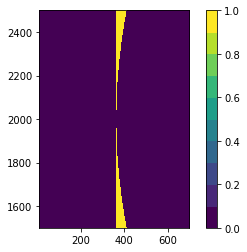

In [78]:
R= plt.imshow(A[1][:,:], cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar()
#plt.clim(0,1)
plt.axis([10, 700, 1500, 2500])
plt.show()

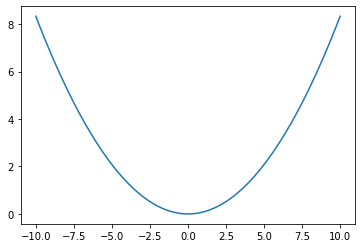

In [249]:
x=np.linspace(-10,10,100)
plt.plot(x, x**2/12)